In [1]:
import pandas as pd
import numpy as np

from nilearn.plotting import plot_glass_brain, plot_epi, plot_matrix
from nilearn import plotting
import nilearn as nil
from nilearn.masking import apply_mask, unmask

import pyreadr

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

In [2]:
data = pd.read_csv('right_insula_shock_lce.csv',index_col=0)
data.index.name = 'VOX'
data.reset_index(inplace=True)
data.head()

,VOX,mean,SD,P+,2.5%,5%,50%,95%,97.5%
0,vox000,-0.0396,0.0443,0.1844,-0.1296,-0.1132,-0.0389,0.0326,0.0466
1,vox001,0.0328,0.0421,0.7798,-0.0497,-0.0360,0.0330,0.1014,0.1154
2,vox002,0.0642,0.0428,0.9356,-0.0190,-0.0049,0.0637,0.1353,0.1497
3,vox003,0.0702,0.0412,0.9566,-0.0097,0.0031,0.0701,0.1381,0.1507
4,vox004,-0.0345,0.0394,0.1924,-0.1111,-0.0999,-0.0344,0.0302,0.0426


In [3]:
mask_path = '/data/bswift-1/Pessoa_Lab/eCON/ROI_masks/EmoproxII_ROIs_final/emoproxII_ROIs_final.nii.gz'

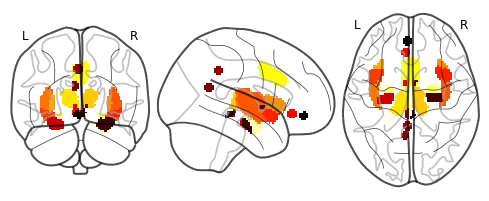

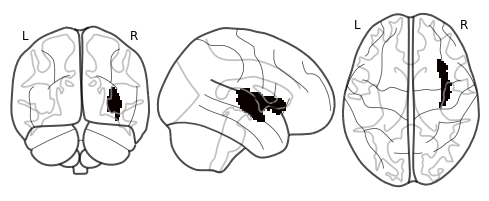

In [4]:
mask = nil.image.load_img(mask_path)
plot_glass_brain(mask)
insula_idx = np.where(np.logical_or(mask.get_data() == 10,mask.get_data()==12,mask.get_data()==14))
insula = np.zeros_like(mask.get_data())
insula[insula_idx] = 1
insula_img = nil.image.new_img_like(mask,insula)
plot_glass_brain(insula_img)

In [5]:
voxelwise_path = '/data/bswift-1/Pessoa_Lab/eCON/dataset/results_ShockUncensored/{subj}/{group}lable/splitted_regs/shock_analysis/noProx/buttonPress/{subj}_shock_beta.nii.gz'
uncon = nil.image.load_img(voxelwise_path.format(subj='CON031',group='uncontrol'))

In [6]:
uncon_beta = apply_mask(uncon,insula_img)

In [7]:
uncon_beta.shape

(810,)

In [9]:
rendered_bi = unmask(data['P+']-0.5,insula_img)
rendered = unmask(data['P+'],insula_img)

In [10]:
type(rendered)

nibabel.nifti1.Nifti1Image

In [11]:
rendered_bi.to_filename('right_insula_shock_rendered_bi.nii.gz')
rendered.to_filename('right_insula_shock_rendered.nii.gz')